                        DATA ANALYSIS FOR PHARMOUTICAL DATA 

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings



In [34]:
logging.basicConfig(level=logging.INFO, filename='../log/data_exploration.log', 
                    format='%(asctime)s - %(levelname)s - %(message)s')

In [36]:
train_data = pd.read_csv('../rossmann-store-sales/train.csv', low_memory=False)
test_data = pd.read_csv('../rossmann-store-sales/test.csv', low_memory=False)
store_data = pd.read_csv('../rossmann-store-sales/store.csv', low_memory=False)

logging.info("Data Loaded: Train data shape: {}, Test data shape: {}".format(train_data.shape, test_data.shape))


In [37]:
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

logging.info("Missing values in train data:\n{}".format(missing_values_train[missing_values_train > 0]))
logging.info("Missing values in test data:\n{}".format(missing_values_test[missing_values_test > 0]))


In [38]:
train_data.dropna(inplace=True)

In [39]:
Q1 = train_data['Sales'].quantile(0.25)
Q3 = train_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_data[(train_data['Sales'] < (Q1 - 1.5 * IQR)) | (train_data['Sales'] > (Q3 + 1.5 * IQR))]

logging.info("Number of outliers detected: {}".format(outliers.shape[0]))



In [40]:
cleaned_train_path = '../data/cleaned_train.csv'
train_data.to_csv(cleaned_train_path, index=False)
logging.info("Cleaned train data saved to {}".format(cleaned_train_path))

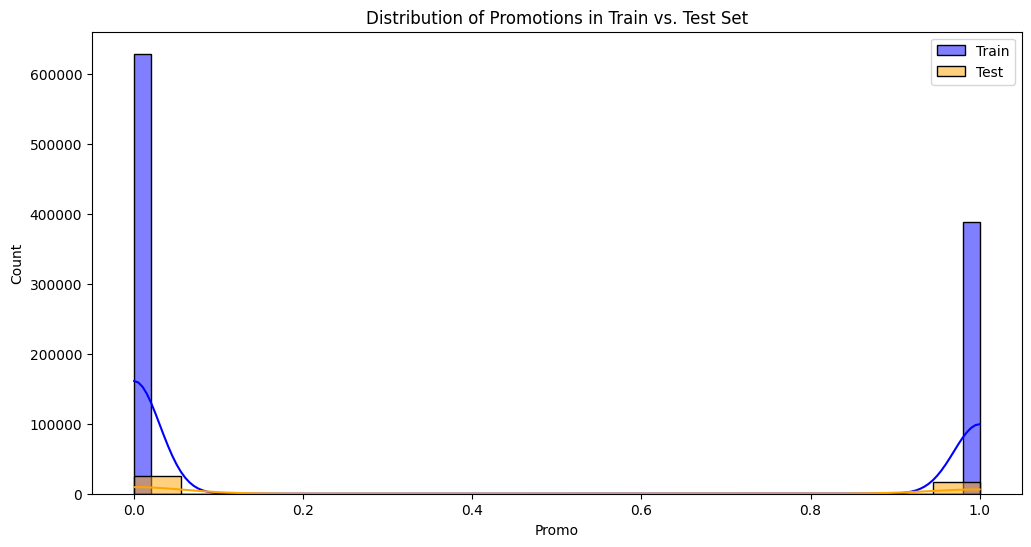

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data['Promo'], kde=True, color='blue', label='Train')
sns.histplot(test_data['Promo'], kde=True, color='orange', label='Test')
plt.title('Distribution of Promotions in Train vs. Test Set')
plt.legend()
plt.show()

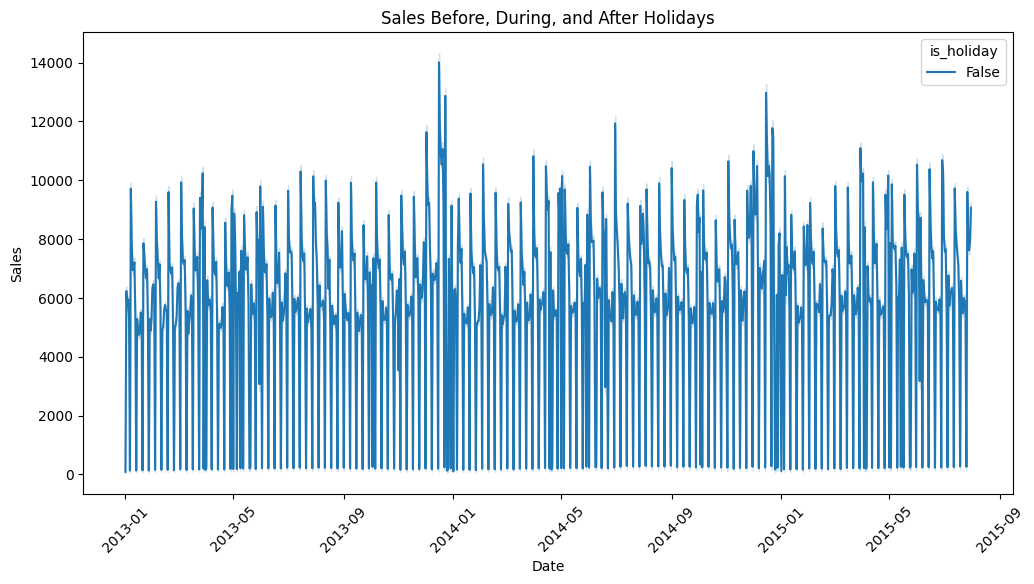

In [42]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['is_holiday'] = train_data['Date'].dt.date.isin(['2021-12-25', '2022-01-01'])  # Example holidays

plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Date', y='Sales', hue='is_holiday')
plt.title('Sales Before, During, and After Holidays')
plt.xticks(rotation=45)
plt.show()

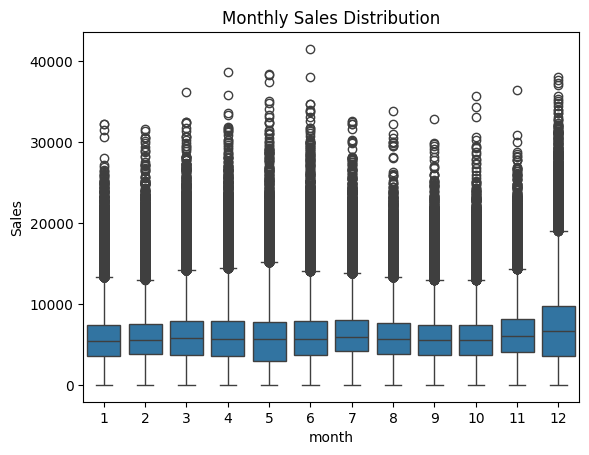

In [43]:
train_data['month'] = train_data['Date'].dt.month
sns.boxplot(data=train_data, x='month', y='Sales')
plt.title('Monthly Sales Distribution')
plt.show()

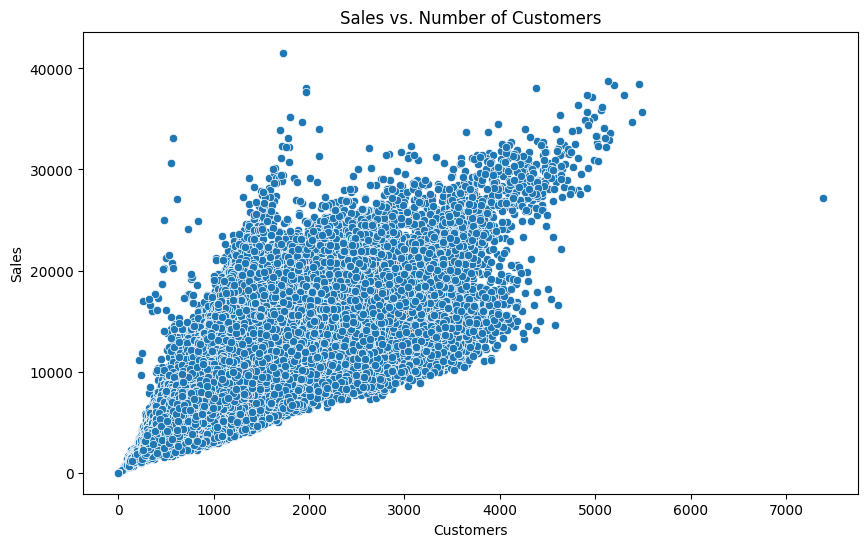

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Customers', y='Sales')
plt.title('Sales vs. Number of Customers')
plt.show()

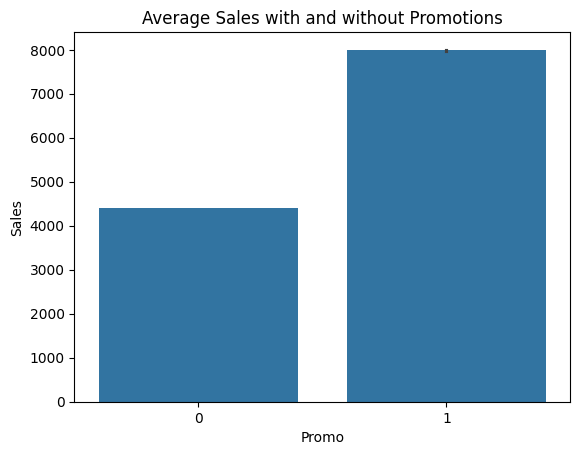

In [45]:
sns.barplot(data=train_data, x='Promo', y='Sales')
plt.title('Average Sales with and without Promotions')
plt.show()

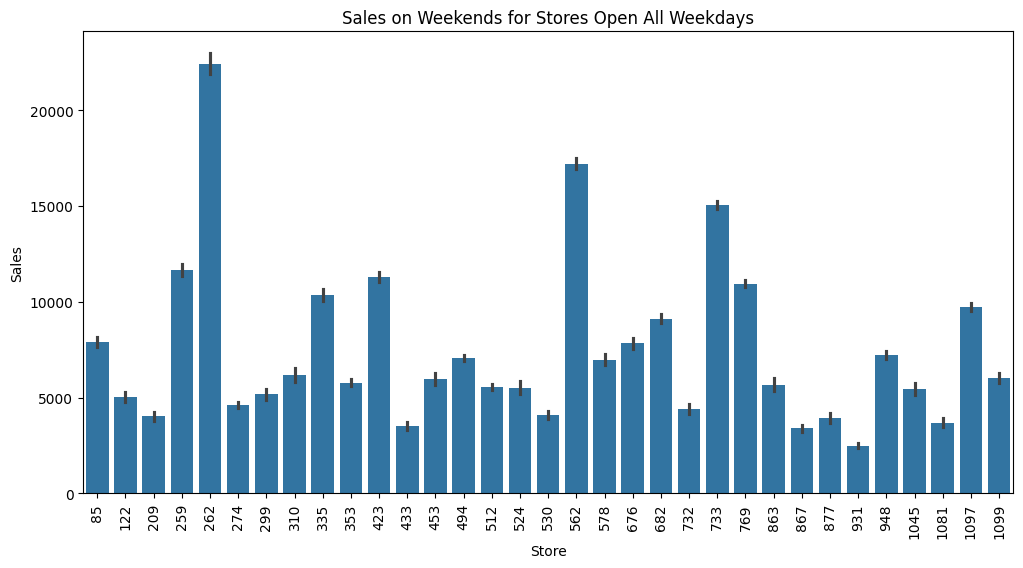

In [46]:
# Analysis of Stores Open on All Weekdays
weekdays = train_data[train_data['Open'] == 1].groupby('Store')['DayOfWeek'].nunique()
stores_open_all_weekdays = weekdays[weekdays == 7].index.tolist()
sales_weekend = train_data[(train_data['Store'].isin(stores_open_all_weekdays)) & (train_data['DayOfWeek'] >= 5)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales', data=sales_weekend)
plt.title('Sales on Weekends for Stores Open All Weekdays')
plt.xticks(rotation=90)
plt.show()

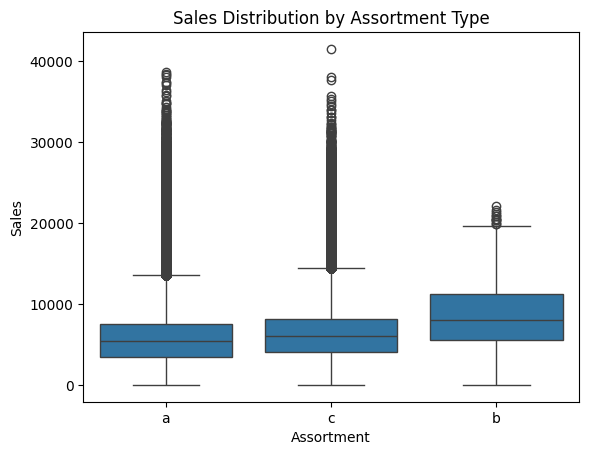

In [47]:
# Assuming 'Assortment' column exists in store_data
store_data = store_data[['Store', 'Assortment']]  # Example structure
merged_data = train_data.merge(store_data, on='Store')
sns.boxplot(data=merged_data, x='Assortment', y='Sales')
plt.title('Sales Distribution by Assortment Type')
plt.show()

In [49]:
# Final Logging and Saving Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(train_data['Promo'], kde=True, color='blue', label='Train')
sns.histplot(test_data['Promo'], kde=True, color='orange', label='Test')
plt.title('Distribution of Promotions in Train vs. Test Set')
plt.legend()
plt.savefig('./eda_analysis/eda_visualizations_promotions.png') 
plt.close() 
#
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Date', y='Sales', hue='is_holiday')
plt.title('Sales Before, During, and After Holidays')
plt.xticks(rotation=45)
plt.savefig('./eda_analysis/eda_visualizations_holidays.png')
plt.close()

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='month', y='Sales')
plt.title('Monthly Sales Distribution')
plt.savefig('./eda_analysis/eda_visualizations_monthly.png')
plt.close()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Customers', y='Sales')
plt.title('Sales vs. Number of Customers')
plt.savefig('./eda_analysis/eda_visualizations_customers.png')
plt.close()

plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='Promo', y='Sales')
plt.title('Average Sales with and without Promotions')
plt.savefig('./eda_analysis/eda_visualizations_promotions_effect.png')
plt.close()

logging.info("All visualizations saved.")
